# `mocksipipeline` Pipeline Example

This notebook provides an example of how to run the pipeline to produce simulated MOXSI data.
This is still a semi-early version of this.

In [27]:
import astropy.units as u
import astropy.time
import numpy as np
import matplotlib.pyplot as plt
import aiapy
from sunpy.net import Fido, attrs as a
from astropy.visualization import quantity_support,ImageNormalize,LogStretch,AsinhStretch
from astropy.coordinates import SkyCoord
from astropy.wcs.utils import wcs_to_celestial_frame

from mocksipipeline.physics.dem.data_prep import DataQuery
from mocksipipeline.physics.spectral import SpectralModel
from mocksipipeline.net import XRTSynopticClient, FilterWheel1, FilterWheel2

In [2]:
q = Fido.search(
    a.Time('2022-01-01', end='now'),
    a.hek.EventType('FL'),
    a.hek.FL.GOESCls > "X1.0",
    a.hek.OBS.Observatory == "GOES"
)

In [3]:
q[0][['event_starttime', 'event_endtime']]

event_starttime,event_endtime
Time,Time
2022-03-30 17:21:00.000,2022-03-30 17:46:00.000
2022-04-17 03:17:00.000,2022-04-17 03:51:00.000
2022-04-20 03:41:00.000,2022-04-20 04:04:00.000
2022-04-30 13:37:00.000,2022-04-30 13:52:00.000
2022-05-03 13:09:00.000,2022-05-03 13:31:00.000
2022-05-10 13:50:00.000,2022-05-10 13:59:00.000


In [2]:
flare_time = astropy.time.Time('2022-03-30T17:55')

In [3]:
correction_table = aiapy.calibrate.util.get_correction_table() 
pointing_table = aiapy.calibrate.util.get_pointing_table(flare_time-6*u.h, flare_time+6*u.h)
error_table = aiapy.calibrate.util.get_error_table(
    error_table='/Users/wtbarnes/ssw/sdo/aia/response/aia_V3_error_table.txt'
)

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 1 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 100 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 10 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


In [4]:
temperature_bin_edges = 10**np.arange(5.5, 7.6, 0.1) * u.K

In [5]:
dq = DataQuery('../pipeline-runs/flare-test',
               flare_time,
               aia_error_table=error_table,
               aia_correction_table=correction_table,
               aia_pointing_table=pointing_table,
               temperature_bin_edges=temperature_bin_edges)

In [6]:
dem_cube = dq.run()

Files Downloaded:   0%|          | 0/7 [00:00<?, ?file/s]

aia_lev1_211a_2022_03_30t17_55_00_25z_image_lev1.fits:   0%|          | 0.00/9.32M [00:00<?, ?B/s]

aia_lev1_171a_2022_03_30t17_54_57_35z_image_lev1.fits:   0%|          | 0.00/11.9M [00:00<?, ?B/s]

aia_lev1_94a_2022_03_30t17_54_59_12z_image_lev1.fits:   0%|          | 0.00/10.9M [00:00<?, ?B/s]

aia_lev1_335a_2022_03_30t17_55_00_62z_image_lev1.fits:   0%|          | 0.00/7.22M [00:00<?, ?B/s]

comp_XRT20220330_172919.2.fits:   0%|          | 0.00/4.22M [00:00<?, ?B/s]

aia_lev1_131a_2022_03_30t17_54_58_34z_image_lev1.fits:   0%|          | 0.00/7.06M [00:00<?, ?B/s]

aia_lev1_193a_2022_03_30t17_54_55_45z_image_lev1.fits:   0%|          | 0.00/8.33M [00:00<?, ?B/s]

Files Downloaded: 0file [00:00, ?file/s]

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:626: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:626: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:626: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units/quantity.py:626: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/astropy/units

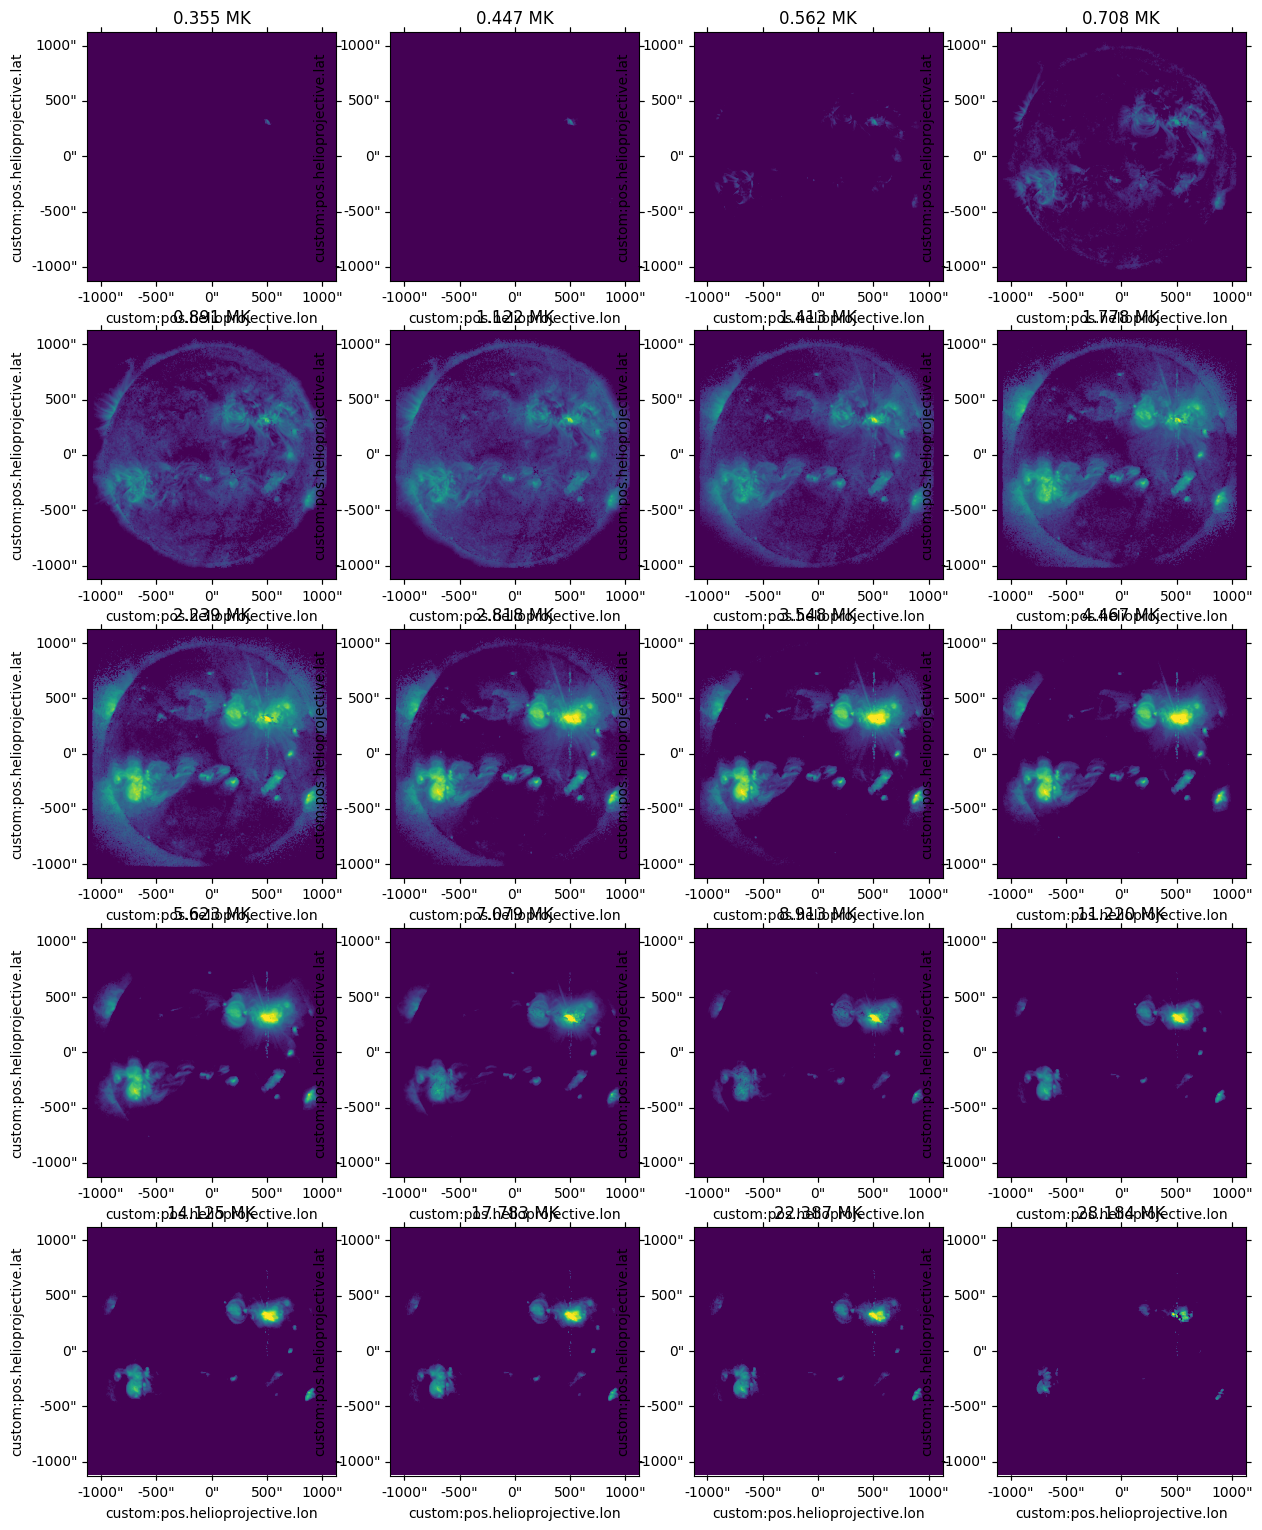

In [7]:
fig = plt.figure(figsize=(15,15*5/4))
for i,cube in enumerate(dem_cube['em']):
    ax = fig.add_subplot(5,4,i+1,projection=cube)
    ax.set_title(f'{dq.temperature_bin_centers[i].to("MK"):.3f}')
    cube.plot(axes=ax,norm=ImageNormalize(vmax=1e28,vmin=1e25,stretch=LogStretch()))

In [28]:
celestial_wcs = dq.collection['94.0 Angstrom'].wcs

In [66]:
flare_loc = SkyCoord(Tx=500*u.arcsec, Ty=300*u.arcsec, frame=wcs_to_celestial_frame(celestial_wcs))

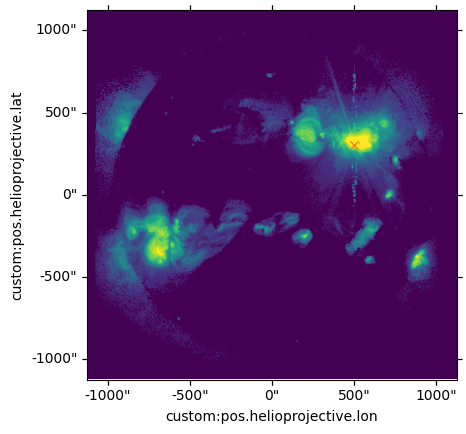

In [67]:
fig = plt.figure()
ax = fig.add_subplot(projection=dem_cube['em'][10].wcs)
dem_cube['em'][10].plot(norm=ImageNormalize(vmax=1e28,vmin=1e25,stretch=LogStretch()),axes=ax)
ax.plot_coord(flare_loc,marker='x',color='C1',ls='')

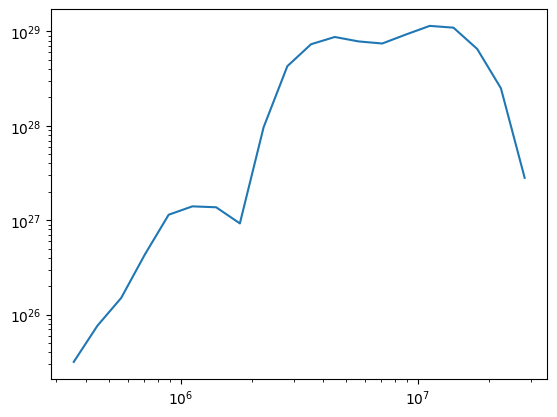

In [68]:
ir,ic = dem_cube['em'][0].wcs.world_to_array_index(flare_loc)
plt.plot(dq.temperature_bin_centers,dem_cube['em'].data[:,ir,ic])
plt.xscale('log')
plt.yscale('log')

In [9]:
spec_model = SpectralModel(celestial_wcs,)

In [10]:
spec_cube = spec_model.run(dem_cube['em'])

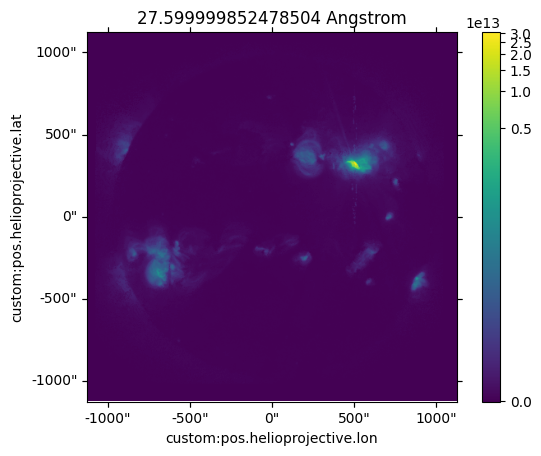

In [18]:
i_wave = 500
spec_cube[i_wave].plot(norm=ImageNormalize(stretch=LogStretch()))
plt.title(spec_cube.axis_world_coords(0)[0][i_wave].to('Angstrom'))
plt.colorbar()

## DEM Sandbox

In [14]:
import sunkit_dem

In [16]:
dem_model = sunkit_dem.Model(
    dq.collection[250:350,275:375],
    dq.response_kernels,
    dq.temperature_bin_edges,
    model='hk12',
)

In [45]:
dem_test = dem_model.fit(
    alpha=1.0,
    increase_alpha=1.5,
    max_iterations=50,
)

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/demregpy/demmap.py:198: RuntimeWarning: divide by zero encountered in divide
  rmatrixin[:,kk]=rmatrix[:,kk]/ednin[kk]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/demregpy/demmap.py:199: RuntimeWarning: divide by zero encountered in divide
  dn=dnin/ednin
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/demregpy/demmap.py:200: RuntimeWarning: invalid value encountered in divide
  edn=ednin/ednin
  0%|                                                                                                                                     | 0.00/100 [00:00<?, ? x10^2 DEM/s]/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/demregpy/demmap.py:198: RuntimeWarning: divide by zero encountered in divide
  rmatrixin[:,kk]=rmatrix[:,kk]/ednin[kk]
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/demregpy/demmap.py:199: Run

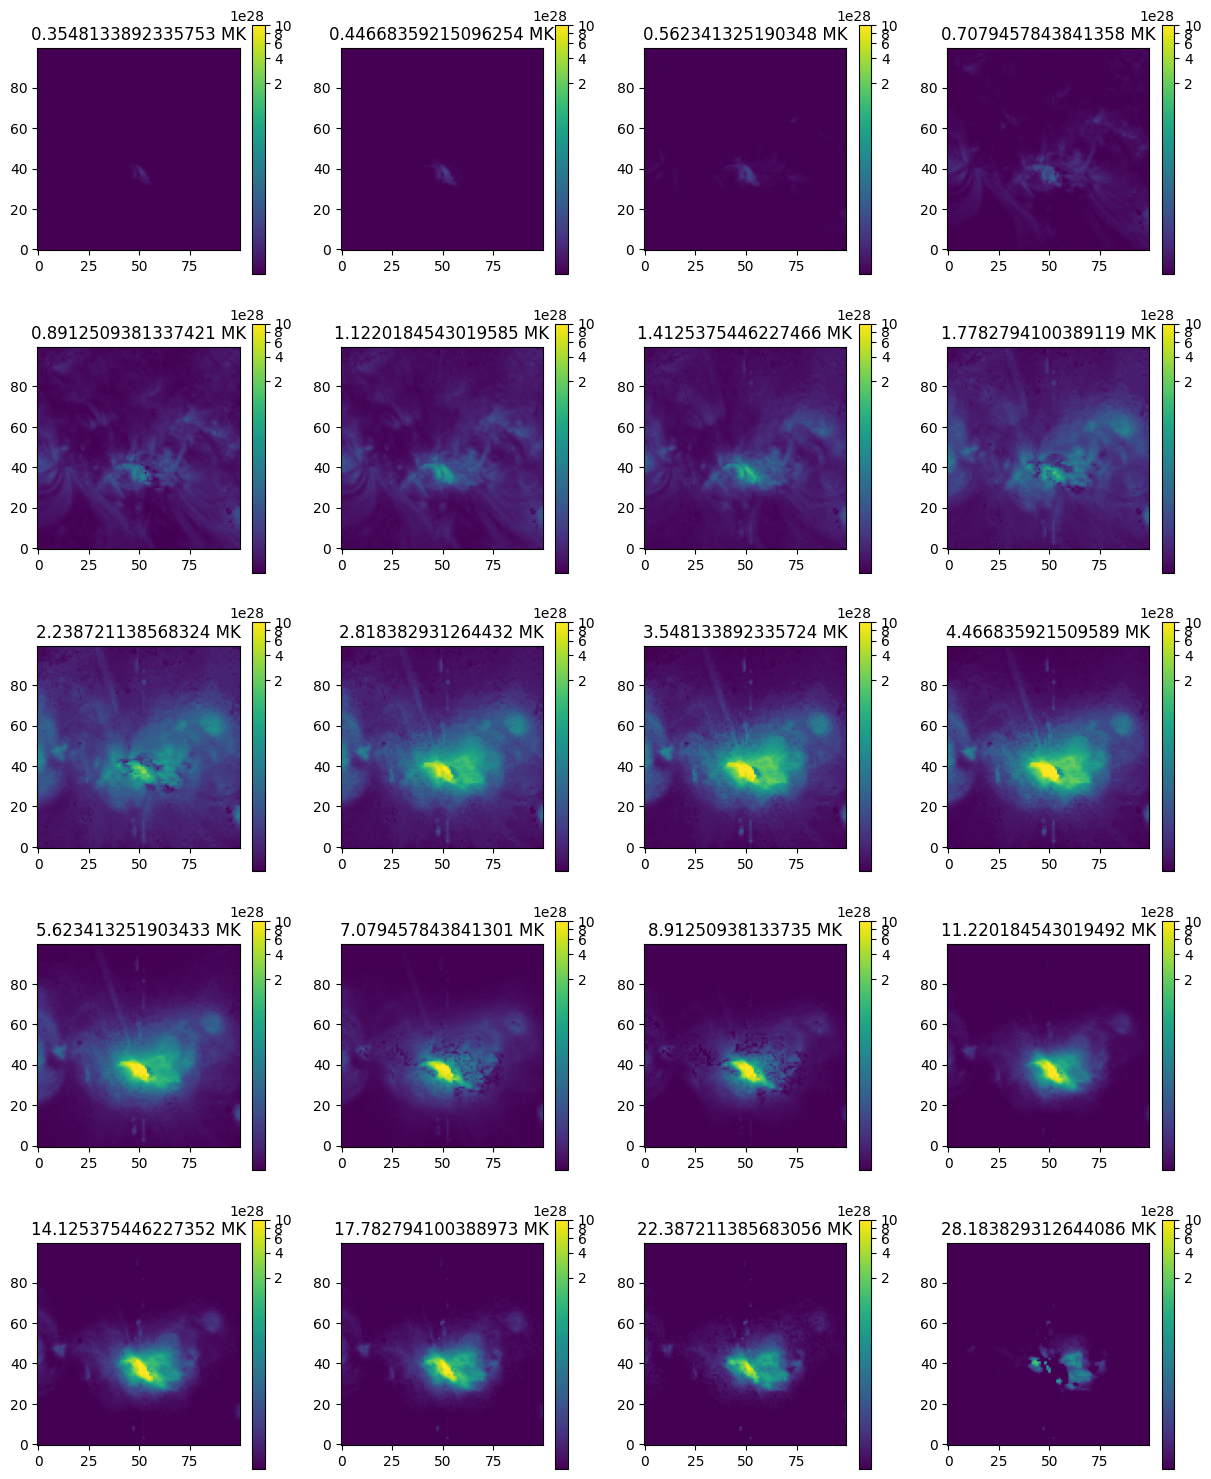

In [46]:
fig = plt.figure(figsize=(15,15*5/4))
for i,cube in enumerate(dem_test['em']):
    ax = fig.add_subplot(5,4,i+1)
    ax.set_title(dem_model.temperature_bin_centers[i].to('MK'))
    im = ax.imshow(cube.data, origin='lower', norm=ImageNormalize(vmax=1e29,vmin=1e25,stretch=LogStretch()))
    fig.colorbar(im)

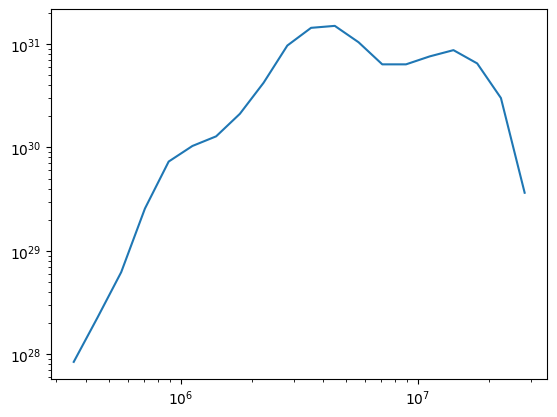

In [47]:
plt.plot(dq.temperature_bin_centers, dem_test['em'].data.sum(axis=(1,2)))
plt.yscale('log')
plt.xscale('log')

In [15]:
import aiapy

In [16]:
psf = aiapy.psf.psf(94*u.angstrom)

In [17]:
psf

array([[4.60785924e-19, 2.32479018e-20, 7.02182465e-21, ...,
        7.93771867e-21, 6.80819254e-21, 2.47934782e-20],
       [2.39754030e-19, 6.78289975e-21, 2.70996339e-20, ...,
        1.30284724e-20, 2.65214007e-20, 5.56855716e-21],
       [6.19263597e-20, 1.79629045e-20, 2.34727740e-20, ...,
        5.35619713e-21, 9.28742196e-21, 3.47981757e-20],
       ...,
       [5.31123728e-20, 8.81561099e-21, 5.86057299e-21, ...,
        8.04738976e-21, 9.51783177e-21, 1.51250869e-20],
       [6.24735004e-20, 3.52169671e-20, 1.25408920e-20, ...,
        9.73032574e-21, 2.38707768e-20, 1.79766677e-20],
       [2.40086119e-19, 2.54438315e-20, 2.11168802e-20, ...,
        5.91496117e-21, 3.34095760e-20, 4.36772476e-20]])

In [19]:
import sunpy.map

In [41]:
m = sunpy.map.Map('../pipeline-runs/flare-test/AIA/aia_lev1_94a_2022_03_30t17_54_59_12z_image_lev1.fits')

In [42]:
%%timeit -n 1 -r 1
m_decon = aiapy.psf.deconvolve(m, psf=psf)

23.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


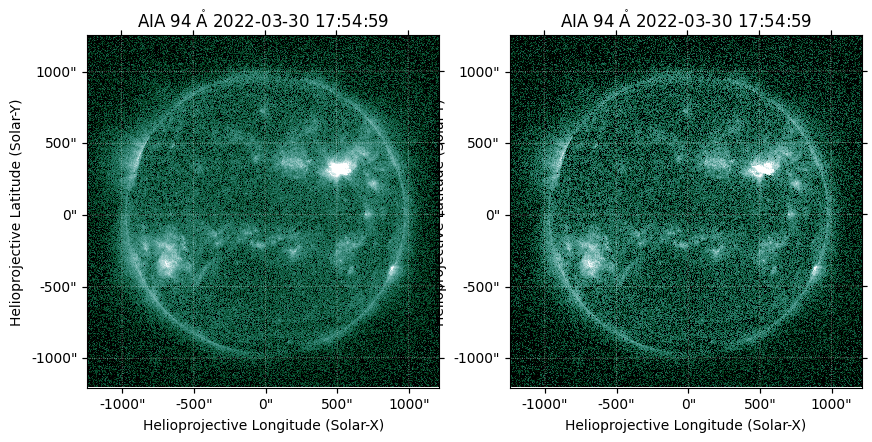

In [46]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121, projection=m)
m.plot(axes=ax,vmin=0,vmax=100)
ax = fig.add_subplot(122, projection=m)
m_decon.plot(axes=ax, vmin=0, vmax=100)

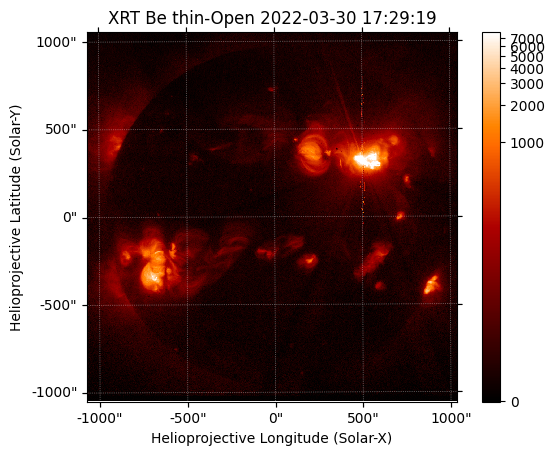

In [48]:
m_xrt = sunpy.map.Map('../pipeline-runs/flare-test/XRT/comp_XRT20220330_172919.2.fits')
m_xrt.peek(clip_interval=(1,99.9)*u.percent)